In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

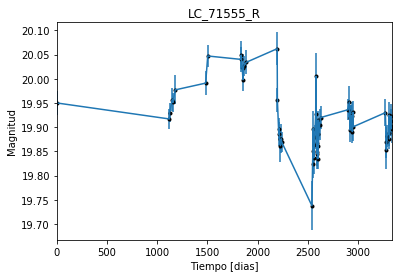

In [2]:
data = np.genfromtxt('LC_71555_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71555_R')
plt.savefig("LC_71555_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

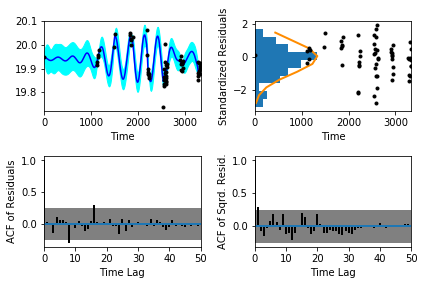

In [5]:
sample.assess_fit()

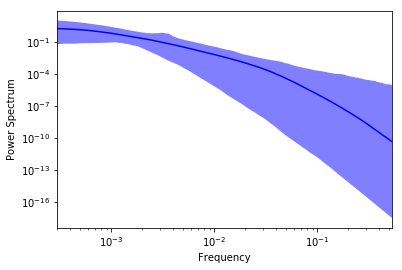

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

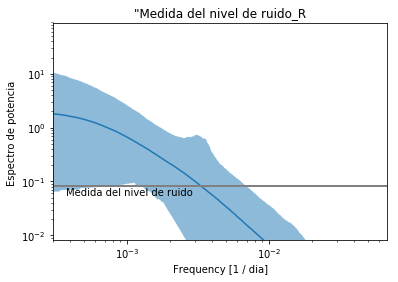

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71555_G')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_71555_R')

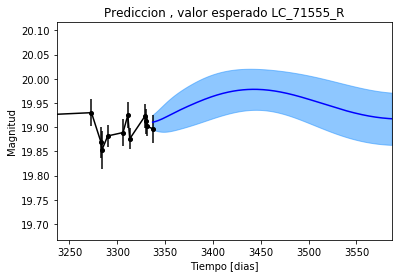

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_71555_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_71555_R')

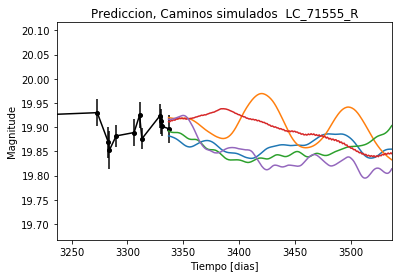

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_71555_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


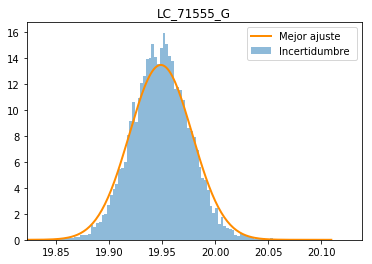

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71555_G')
plt.savefig("Mejor_ajuste_LC_71555_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_71555_R')

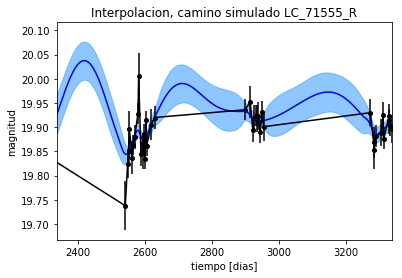

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_R')

Text(0.5,1,'Interpolacion, camino simulado LC_71555_R')

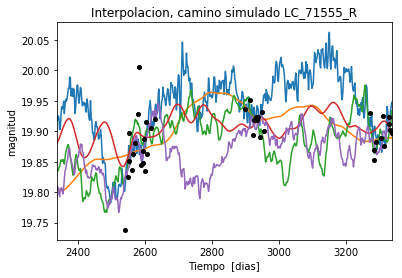

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71555_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 951.956226002
Median: 0.0189331324209
Standard deviation: 0.209941552967
68% credibility interval: [ 0.00137632  0.22240524]
95% credibility interval: [  3.64504012e-04   8.42546650e-01]
99% credibility interval: [  3.17421282e-04   1.01985218e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 631.739477528
Median: 0.00489098407253
Standard deviation: 0.101468372871
68% credibility interval: [ 0.00057853  0.0547089 ]
95% credibility interval: [ 0.0003257   0.31620034]
99% credibility interval: [  3.04236980e-04   6.80579529e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 466.773951511
Median: 0.048529775305
Standard de

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1004.07429224
Median: 139.675007549
Standard deviation: 1.64566914688
68% credibility interval: [ 137.88742106  140.89342815]
95% credibility interval: [ 135.36617903  141.71941222]
99% credibility interval: [ 133.40450036  142.08480523]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 566.454693888
Median: 1.11204143071
Standard deviation: 2.48945154076
68% credibility interval: [ 0.12051261  4.80433516]
95% credibility interval: [ 0.01960036  8.67992087]
99% credibility interval: [  0.0117624   11.50853317]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1261.67956352
Median: 1.15557498638
Standard deviation: 11.4189099106
68% credibility interval: [  0.03478128  13.84285463]
95% credibility interval: [  1.24314558e

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 38529.9773992
Median: 2.06277761515e-24
Standard deviation: 9.7322730657e+135
68% credibility interval: [  1.23044434e-66   8.75524135e+00]
95% credibility interval: [  8.18916472e-094   6.49433024e+124]
99% credibility interval: [  4.07446019e-108   1.15460336e+136]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2220.99172938
Median: 19.9401716966
Standard deviation: 0.0345352263174
68% credibility interval: [ 19.91157879  19.96836925]
95% credibility interval: [ 19.86877553  20.01044828]
99% credibility interval: [ 19.82216581  20.04928621]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 345.773835518
Median: 0.0204971271681
Standard deviation: 0.276057435844
68% credibility interval: [ 0.          0.45097876]
95% credibility interval: [ 0.          0.97602778]
99% credibility interval: [ 0.          1.05160068]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 345.773835518
Median: 0.0204971271681
Standard deviation: 0.276057435844
68% credibility interval: [ 0.          0.45097876]
95% credibility interval: [ 0.          0.97602778]
99% credibility interval: [ 0.          1.05160068]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 899.16504441
Median: 0.0
Standard deviation: 0.000708092261261
68% cre

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1004.07429224
Median: 139.675007549
Standard deviation: 1.64566914688
68% credibility interval: [ 137.88742106  140.89342815]
95% credibility interval: [ 135.36617903  141.71941222]
99% credibility interval: [ 133.40450036  142.08480523]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1481.57300416
Median: 0.00495537058676
Standard deviation: 0.0058370472113
68% credibility interval: [ 0.00285235  0.00918822]
95% credibility interval: [ 0.00181918  0.02004656]
99% credibility interval: [ 0.00139206  0.03555046]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1114.1117644
Median: 1.13154554832
Standard deviation: 0.196090767418
68% credibility interval: [ 0.95745383  1.34847084]
95% credibility interval: [ 0.82184131  1.57750011]
99% credibility interval: [ 0.74452668  1.72337504]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1248.59832224
Median: 0.00029912394796
Standard deviation: 0.121581350717
68% credibility interval: [  2.29290950e-07   1.40978990e-02]
95% credibility interval: [  2.14208855e-128   3.19393244e-001]
99% credibility interval: [  1.40717805e-137   8.64876315e-001]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 951.956226002
Median: (-0.118960379446-2.4426809706j)
Standard deviation: 2.17912573324
68% credibility interval: [-1.39741334+0.j         -0.00864768-2.45359995j]
95% credibility interval: [ -5.29387673e+00+0.j         -2.29024625e-03-0.0008831j]
99% credibility interval: [ -6.40792026e+00-6.5851859j   -1.99441674e-03-0.23963635j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 631.739477528
Median: (-0.0307309592621+0.974713752759j)
Standard deviation: 1.84797803565
68% credibility interval: [-0.34374618+1.87051622j -0.00363499+0.j        ]
95% credibility interval: [-1.98674532 +3.51951215e+00j -0.00204644 +3.07746867e-03j]
99% credibility interval: [ -4.27620730e+00+3.29228512j  -1.91157732e-03+2.90970808j]
Posteri